# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
#import sys
#!{sys.executable} -m pip install citipy
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        print(city)

# Print the city count to confirm sufficient count
len(cities)

punta arenas
saint-philippe
kamaishi
mattawa
poum
busselton
itoman
hasaki
port alfred
naze
kiruna
sakakah
codrington
salair
labutta
bhatkal
illoqqortoormiut
komsomolskiy
mataura
hermanus
albany
najran
ushuaia
barentsburg
bluff
makakilo city
kapaa
kodiak
amot
hede
katsuura
qazvin
talara
vaini
kassala
saint-augustin
hithadhoo
tilichiki
jamestown
oussouye
rikitea
longyearbyen
tasiilaq
iqaluit
new norfolk
vanavara
abiy adi
aklavik
lugovskiy
paidha
monrovia
carnarvon
saint george
qaanaaq
san carlos
attawapiskat
sorland
cockburn town
maniitsoq
port elizabeth
hobart
yanam
machaneng
linares
lompoc
moose factory
mairena del alcor
tuktoyaktuk
tsihombe
sao joaquim
cururupu
banjar
talaya
meadow lake
sur
toliary
grindavik
rio gallegos
barrow
nanortalik
kalemie
cedar city
baglung
geraldton
arraial do cabo
bulgan
leningradskiy
mitsamiouli
yellowknife
camacha
vologda
cacoal
iisalmi
san patricio
omaruru
atuona
dunmore east
ures
mangrol
sosnovo-ozerskoye
seoul
avarua
ancud
warrnambool
empalme
tiksi
cher

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [59]:
# Save config information.
api_key = "api-key"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
cities_array = []
cloudiness = []
country = []
date = []
lat = []
lon = []
max_temp = []
min_temp = []
wind_speed = []
humidity = []

# Loop through the list of cities and perform a request for data on each
print(f"   Data retrieval")
print(f"---------------------")
for city in cities:
    response = requests.get(query_url + city).json()
#    print(response.get('status_code'))

#    print(response.get('name'))
    if( response.get('name') == None): 
#        print(response.get('name'))
        print(f"----------------------->{city} was not found")
    else:
        print(f"Processing city: {city}")
        cities_array.append(response.get('name'))
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        max_temp.append(response['main']['temp_max'])
        min_temp.append(response['main']['temp_min'])
        wind_speed.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])

print(f"---------- Finished processing all cities ----------")

   Data retrieval
---------------------
Processing city: punta arenas
Processing city: saint-philippe
Processing city: kamaishi
Processing city: mattawa
Processing city: poum
Processing city: busselton
Processing city: itoman
Processing city: hasaki
Processing city: port alfred
Processing city: naze
Processing city: kiruna
----------------------->sakakah was not found
Processing city: codrington
Processing city: salair
----------------------->labutta was not found
Processing city: bhatkal
----------------------->illoqqortoormiut was not found
Processing city: komsomolskiy
Processing city: mataura
Processing city: hermanus
Processing city: albany
Processing city: najran
Processing city: ushuaia
----------------------->barentsburg was not found
Processing city: bluff
Processing city: makakilo city
Processing city: kapaa
Processing city: kodiak
Processing city: amot
Processing city: hede
Processing city: katsuura
Processing city: qazvin
Processing city: talara
Processing city: vaini
Proce

----------------------->tumannyy was not found
Processing city: gravdal
Processing city: atar
----------------------->bengkulu was not found
Processing city: noumea
Processing city: kununurra
Processing city: dauphin
Processing city: camabatela
Processing city: altay
Processing city: pevek
Processing city: half moon bay
Processing city: richards bay
Processing city: fort nelson
Processing city: karratha
----------------------->qandahar was not found
Processing city: hualmay
----------------------->hlotse was not found
Processing city: kaeo
Processing city: ponta do sol
Processing city: danane
Processing city: rincon
Processing city: vad
Processing city: namibe
Processing city: shasta lake
----------------------->sentyabrskiy was not found
Processing city: kant
Processing city: eureka
Processing city: severo-kurilsk
----------------------->yeletskiy was not found
Processing city: doha
Processing city: pangnirtung
Processing city: lorengau
Processing city: edd
Processing city: hun
Proces

Processing city: impfondo
Processing city: port hawkesbury
Processing city: lagos
Processing city: ostersund
Processing city: hofn
Processing city: salinas
Processing city: trollhattan
Processing city: kitzbuhel
Processing city: san mateo
Processing city: prado
Processing city: zhigansk
Processing city: touros
Processing city: kuala lipis
Processing city: linfen
Processing city: sabana grande de boya
Processing city: sunrise manor
Processing city: antalaha
Processing city: kano
Processing city: yamada
Processing city: taga
Processing city: dwarka
Processing city: pula
Processing city: portland
Processing city: punta alta
Processing city: wakkanai
Processing city: itupiranga
Processing city: ternate
Processing city: rongcheng
Processing city: klyuchi
Processing city: tezu
Processing city: vao
----------------------->ngukurr was not found
----------------------->hvolsvollur was not found
Processing city: alofi
Processing city: anori
Processing city: bonthe
Processing city: beloha
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [61]:
# creating a dictionary from the city data
weather_dict = {
    "City": cities_array, 
    "Cloudiness": cloudiness, 
    "Country": country, 
    "Date": date, 
    "Latitude": lat, 
    "Longitude": lon, 
    "MaxTemp": max_temp, 
    "WindSpeed": wind_speed,
    "Humidity": humidity
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head(10)


City  Cloudiness Country        Date  Latitude  Longitude  \
0    Punta Arenas           0      CL  1543410000    -53.16     -70.91   
1  Saint-Philippe          90      CA  1543410000     45.36     -73.48   
2        Kamaishi          92      JP  1543411129     39.28     141.86   
3         Mattawa          90      CA  1543406400     46.32     -78.70   
4            Poum          75      MK  1543408200     41.28      20.71   
5       Busselton           0      AU  1543411169    -33.64     115.35   
6          Itoman          75      JP  1543410000     26.12     127.67   
7          Hasaki          75      JP  1543410000     35.73     140.83   
8     Port Alfred          48      ZA  1543411131    -33.59      26.89   
9            Naze          75      NG  1543406400      5.43       7.07   

   MaxTemp  WindSpeed  Humidity  
0    13.00       5.70        66  
1     1.00       6.20        96  
2     6.36       3.77        77  
3    -5.00       7.20        92  
4     5.00       7.20        99  
5    17.66       8.74       100  
6    23.00       7.20        64  
7    14.00       5.10        87  
8    17.16       8.69        87  
9    32.00       3.60        62

In [62]:
# Creating a csv file
weather_data.to_csv('weather_data.csv', encoding='utf-8', index=False)



### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

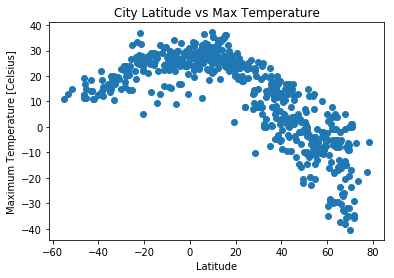

In [71]:
# Plotting Latitude vs Maximum Temperature / C
plt.scatter(weather_data.Latitude, weather_data.MaxTemp)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature [Celsius]")
plt.title("City Latitude vs Max Temperature")
plt.savefig('LatVsMaxT.png')

#### Latitude vs. Humidity Plot

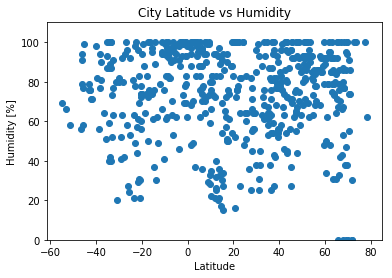

In [72]:
# Plotting Latitude vs Humidity
plt.scatter(weather_data.Latitude, weather_data.Humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity [%]")
plt.title("City Latitude vs Humidity")
plt.ylim((0, 110))
plt.savefig('LatVsHumidity.png')


#### Latitude vs. Cloudiness Plot

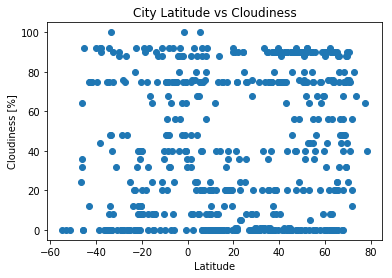

In [73]:
# Plotting Latitude vs Cloudiness
plt.scatter(weather_data.Latitude, weather_data.Cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness [%]")
plt.title("City Latitude vs Cloudiness")
plt.savefig('LatVsCloudiness.png')


#### Latitude vs. Wind Speed Plot

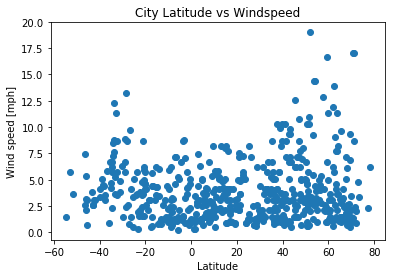

In [74]:
# Plotting Latitude vs Wind speed
plt.scatter(weather_data.Latitude, weather_data.WindSpeed)
plt.xlabel("Latitude")
plt.ylabel("Wind speed [mph]")
plt.title("City Latitude vs Windspeed")
plt.savefig('LatVsWindspeed.png')